In [4]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("finaldata_4000_row.csv")


In [6]:
df.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Temp9am,RainToday,RainTomorrow
0,0,7.7,24.2,0.0,4.8,13.2,NNW,39.0,NNW,NW,9.0,20.0,67.0,39.0,1018.4,1.0,13.5,No,Yes
1,1,18.3,30.8,0.0,9.8,10.8,E,44.0,SE,SSE,26.0,24.0,18.0,8.0,1017.6,1.0,21.7,No,No
2,2,14.4,19.4,4.8,5.8,10.1,W,61.0,SW,SSW,30.0,33.0,69.0,62.0,1009.1,4.0,16.4,Yes,No
3,3,11.8,18.6,0.0,4.0,2.5,WNW,56.0,NW,WNW,20.0,28.0,50.0,42.0,1010.2,7.0,14.8,No,No
4,4,10.8,19.4,8.8,4.4,11.1,S,31.0,SSE,WSW,15.0,15.0,56.0,48.0,1023.5,4.0,14.8,Yes,No


In [7]:
df.columns

Index(['Unnamed: 0', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Temp9am', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
X= df.drop(columns=['RainTomorrow','WindGustDir','WindDir9am','WindDir3pm','RainToday'])
y = df['RainTomorrow'].map({'Yes':1, 'No':0})

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before:\n", y.value_counts())
print("\nAfter:\n", y_res.value_counts())

Before:
 RainTomorrow
0    3063
1     937
Name: count, dtype: int64

After:
 RainTomorrow
1    3063
0    3063
Name: count, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),  
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
 
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    print(f"\nModel: {name}")
    print(f"  Accuracy : {acc:.5f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")



Model: Logistic Regression
  Accuracy : 0.80098
  F1 Score : 0.7960
  Precision: 0.8165
  Recall   : 0.7765

Model: Decision Tree
  Accuracy : 0.79935
  F1 Score : 0.7984
  Precision: 0.8023
  Recall   : 0.7945

Model: Random Forest
  Accuracy : 0.88091
  F1 Score : 0.8807
  Precision: 0.8822
  Recall   : 0.8793

Model: Gradient Boosting
  Accuracy : 0.86297
  F1 Score : 0.8602
  Precision: 0.8778
  Recall   : 0.8434

Model: AdaBoost
  Accuracy : 0.83197
  F1 Score : 0.8314
  Precision: 0.8342
  Recall   : 0.8287

Model: Naive Bayes
  Accuracy : 0.78303
  F1 Score : 0.7823
  Precision: 0.7849
  Recall   : 0.7798

Model: SVM
  Accuracy : 0.67945
  F1 Score : 0.6706
  Precision: 0.6897
  Recall   : 0.6525


In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_params = {
    "n_estimators": [100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=cv, scoring="f1", n_jobs=-1, verbose=1)
rf_grid.fit(X_res, y_res)

print("\nBest Random Forest Params:", rf_grid.best_params_)
y_pred_rf = rf_grid.predict(x_test)

print("\nRandom Forest Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Random Forest Results:
Accuracy : 0.9951060358890701
Precision: 0.9967266775777414
Recall   : 0.9934747145187602
F1 Score : 0.9950980392156863


In [11]:
gb_params = {
    "n_estimators": [100, 200],        #GRADIENT BOOSTING
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5]
}

gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=cv, scoring="f1", n_jobs=-1, verbose=1)
gb_grid.fit(X_res, y_res)

print("\nBest Gradient Boosting Params:", gb_grid.best_params_)
y_pred_gb = gb_grid.predict(x_test)

print("\nGradient Boosting Results:")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall   :", recall_score(y_test, y_pred_gb))
print("F1 Score :", f1_score(y_test, y_pred_gb))

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}

Gradient Boosting Results:
Accuracy : 0.9763458401305057
Precision: 0.9899328859060402
Recall   : 0.9624796084828712
F1 Score : 0.9760132340777502


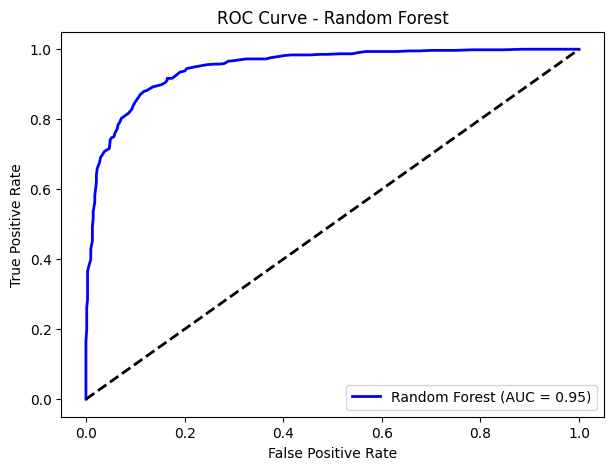

In [12]:
y_prob = models["Random Forest"].predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

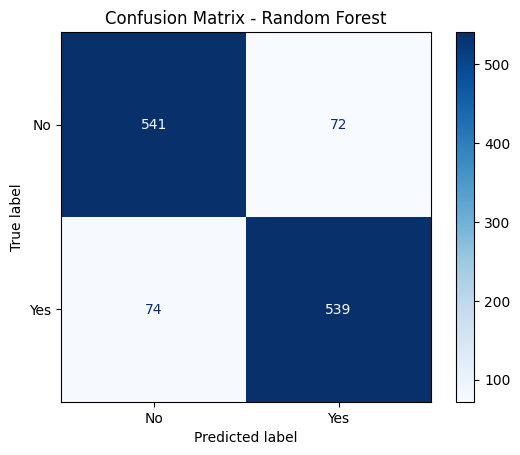

In [13]:
y_pred = models["Random Forest"].predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

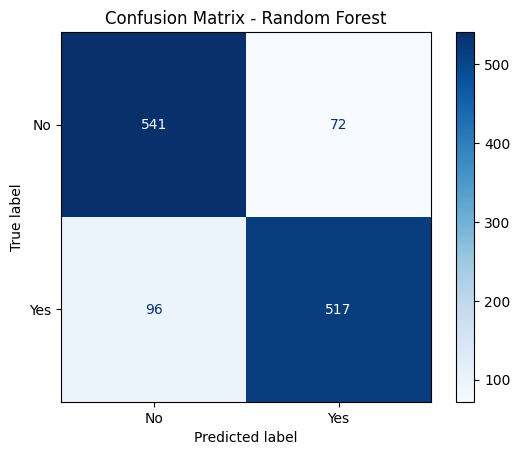

In [16]:
y_pred = models["Gradient Boosting"].predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [14]:
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    results.append([name, acc, f1, prec, rec])

metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"])
display(metrics_df)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.800979,0.795987,0.816467,0.776509
1,Decision Tree,0.792822,0.790429,0.799666,0.781403
2,Random Forest,0.873573,0.872638,0.879139,0.866232
3,Gradient Boosting,0.862969,0.860233,0.877759,0.843393
4,AdaBoost,0.831974,0.831424,0.834154,0.828711
5,Naive Bayes,0.783034,0.782324,0.784893,0.779772
6,SVM,0.679445,0.670578,0.689655,0.652529


In [15]:
import pickle 
with open("rainfall_rf_model.pkl", "wb") as file:
    pickle.dump(rf_grid, file)